In [1]:
import pandas as pd
import numpy as np
pd.set_option('max_columns',999)
pd.set_option('max_rows',200)

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import seaborn as sns
sns.set() 
%matplotlib inline 
%config InlineBackend.figure_format = 'retina' 
sns.set_style(style='white')
sns.set_context(context ='paper')

import datetime
import os
from functools import reduce

In [2]:
# 한글 폰트 사용

plt.rcParams["font.family"] = 'NanumGothic'

In [14]:
projects_fin = pd.read_csv('projects_fin.csv')

In [16]:
print(projects_fin.shape)
projects_fin.head()

(372572, 23)


,Unnamed: 0,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,state_new,deadline_dt,launched_dt,term,term_str,term_bin,usd_goal_real_bin
0,0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,failed,2015-10-09,2015-08-11,59,59,6,3
1,1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,failed,2017-11-01,2017-09-02,60,60,6,6
2,2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,failed,2013-02-26,2013-01-12,45,45,5,6
3,3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,failed,2012-04-16,2012-03-17,30,30,4,4
4,4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00,failed,2015-08-29,2015-07-04,56,56,6,6


### 카테고리는 main_category 컬럼 활용


### >> 특정 카테고리의 특정 기간의 금액별 성공률

In [18]:
projects_fin['main_category'].unique()

array(['Publishing', 'Film & Video', 'Music', 'Food', 'Design', 'Crafts',
       'Games', 'Comics', 'Fashion', 'Theater', 'Art', 'Photography',
       'Technology', 'Dance', 'Journalism'], dtype=object)

In [37]:
cate_df = projects_fin[lambda x: (x['main_category'] == 'Film & Video') & (x['term_bin'] == 1)]

In [38]:
cate_df['usd_goal_real_bin'].unique()

array([3, 2, 5, 1, 6, 4, 8, 7], dtype=int64)

In [42]:
cate_df[lambda x: x['usd_goal_real_bin'] == 7]['state_new'].unique()

array(['failed'], dtype=object)

In [55]:
def cate_success_by_term(cate, term_bin):
    cate_df = projects_fin[lambda x: (x['main_category'] == cate) & (x['term_bin'] == term_bin)]
    
    percent_list = []

    for i in range(8):
        percent = len(cate_df[lambda x: (x['usd_goal_real_bin'] == i+1) & (x['state_new'] == 'success')]) / len(cate_df[lambda x: x['usd_goal_real_bin'] == i+1])
        percent_list.append(percent)
        
    tmp = pd.DataFrame({'bars' : ['500달러이하', '1000달러이하', '3000달러이하', '5000달러이하', '10000달러이하', '50000달러이하', '100000이하', '100000초과'], 
                    'percent' : percent_list})
    
    plt.figure(figsize=(10,6))
    plt.title(cate + ' 카테고리의 ' + str(term_bin) + ' 기간의 금액별 성공률', fontsize = 20)
    sns.barplot(x = "bars", y = "percent", data = tmp, color = '#78BD40')

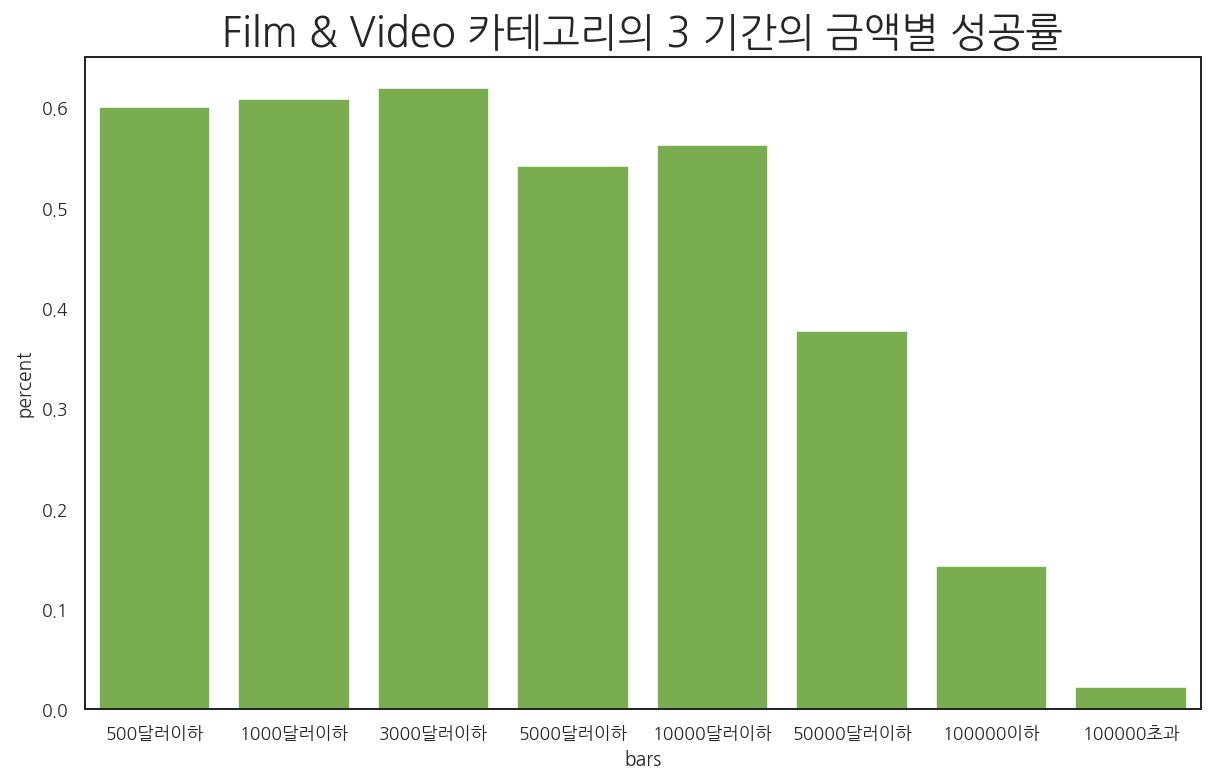

In [63]:
cate_success_by_term('Film & Video', 3)

### >> 특정 카테고리의 특정 기간의 목표 금액 분포 및 성공 / 실패 비율

In [60]:
cate_df = projects_fin[lambda x: (x['main_category'] == 'Film & Video') & (x['term_bin'] == 1)]
fin = cate_df[['state_new', 'usd_goal_real_bin', 'ID']].groupby(['usd_goal_real_bin', 'state_new']).count().unstack().fillna(0)

In [61]:
fin

ID        
state_new         failed success
usd_goal_real_bin               
1                  118.0   156.0
2                  105.0   121.0
3                  136.0   113.0
4                   70.0    45.0
5                   64.0    37.0
6                   64.0    14.0
7                    9.0     0.0
8                   14.0     0.0

In [59]:
fin.reset_index()

usd_goal_real_bin     ID        
state_new                   failed success
0                         1  118.0   156.0
1                         2  105.0   121.0
2                         3  136.0   113.0
3                         4   70.0    45.0
4                         5   64.0    37.0
5                         6   64.0    14.0
6                         7    9.0     0.0
7                         8   14.0     0.0

In [ ]:
fin.usd

In [49]:
def cate_goal_dist(cate, term_bin):
    cate_df = projects_fin[lambda x: (x['main_category'] == cate) & (x['term_bin'] == term_bin)]
    fin = cate_df[['state_new', 'usd_goal_real_bin', 'ID']].groupby(['usd_goal_real_bin', 'state_new']).count().unstack().fillna(0)
    
    ax = fin.plot(kind='bar',stacked=True,figsize=(10, 6),title = cate + ' 카테고리의 ' + str(term_bin) + ' 기간의 목표 금액 분포',
            colormap = 'bwr_r', rot = 0)
    ax.legend(['failed', 'success'])

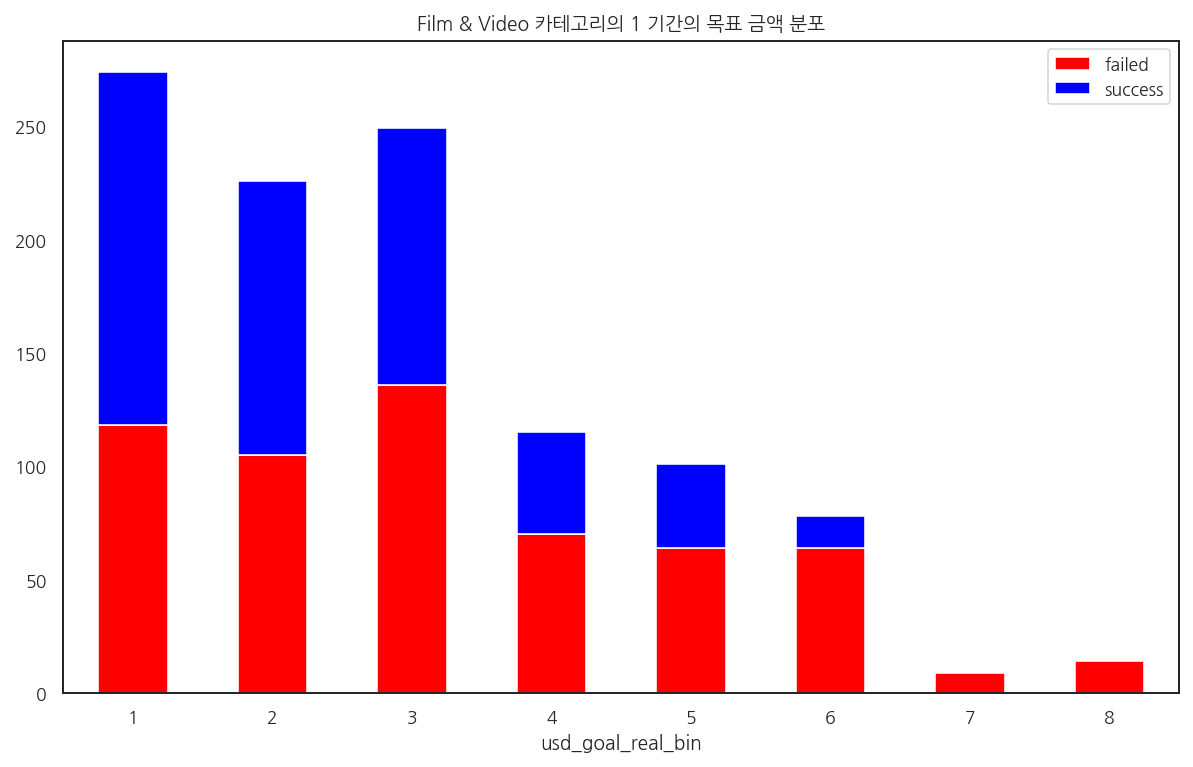

In [50]:
cate_goal_dist('Film & Video', 1)

### >> 특정 카테고리의 특정 기간의 1인당 투자 금액 분포

구간 구하기 위한 그래프...

In [ ]:
len(tmp3[lambda x: (x['pledge_per_person'] >= 5000)])

In [ ]:
len(tmp3[lambda x: (x['pledge_per_person'] <= 500)])

In [53]:
# 5천/ 2500 / 1000 / 500 / 100 / 50
def pledge_per_person(cate, term_bin):
    cate_df = projects_fin[lambda x: (x['main_category'] == cate) & (x['term_bin'] == term_bin) & (x['backers'] != 0)]
    cate_df['pledge_per_person'] = cate_df['usd_goal_real'] / cate_df['backers']
    cate_df['pledge_per_person_bin'] = cate_df.apply(lambda x: '1' if x['pledge_per_person'] <= 50
                                                       else '2' if x['pledge_per_person'] <= 100
                                                       else '3' if x['pledge_per_person'] <= 500
                                                       else '4' if x['pledge_per_person'] <= 1000
                                                       else '5' if x['pledge_per_person'] <= 2500
                                                       else '6' if x['pledge_per_person'] <= 5000
                                                       else '7', axis = 1)
    
    percent_list = []

    for i in range(7):
        percent = len(cate_df[lambda x: (x['pledge_per_person_bin'] == str(i+1))]) / len(cate_df)
        percent_list.append(percent)
        
    tmp = pd.DataFrame({'bars' : ['50달러이하', '100달러이하', '500달러이하', '1000달러이하', '2500달러이하', '5000달러이하', '5000달러초과'], 
                    'percent' : percent_list})
    
    plt.figure(figsize=(10,6))
    plt.title(cate + ' 카테고리의 ' + str(term_bin) + ' 기간의 1인당 투자 금액 분포', fontsize = 20)
    sns.barplot(x = "bars", y = "percent", data = tmp, color = '#78BD40')   

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


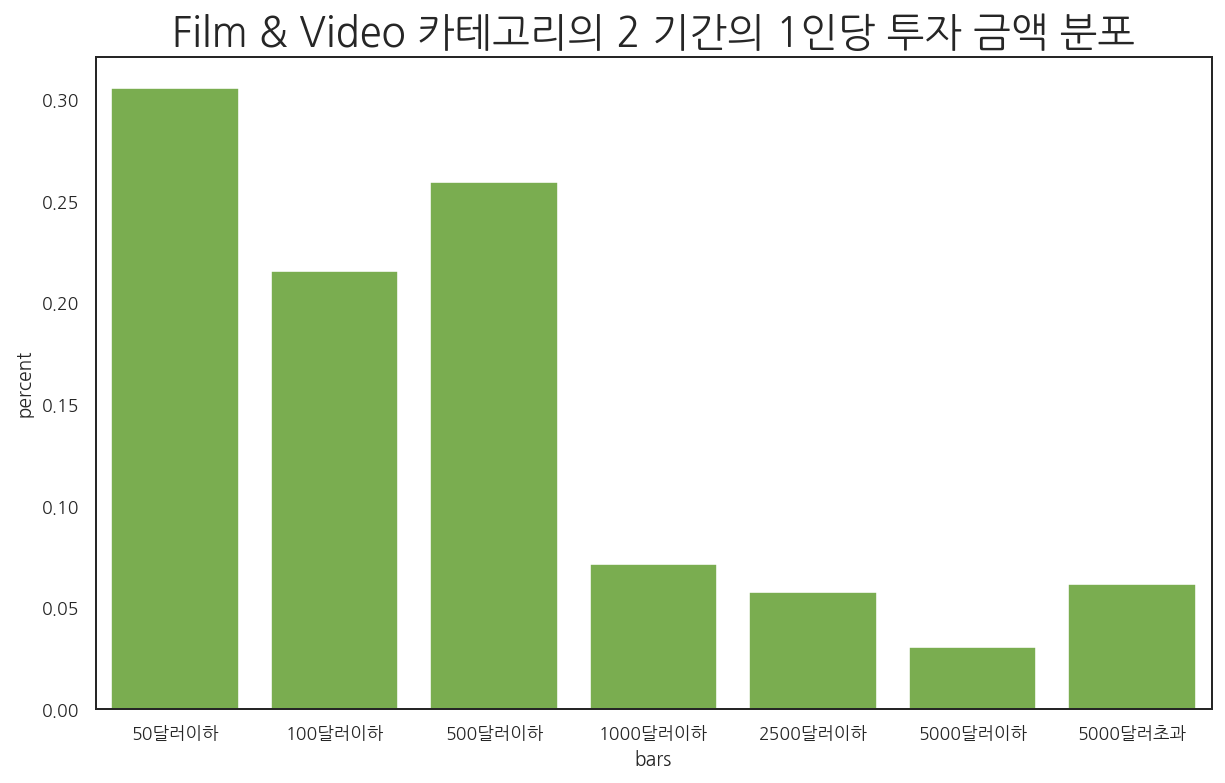

In [62]:
pledge_per_person('Film & Video', 2)